In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
import astropy
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
import numpy as np
#import ogr
#import shapely.wkt
#import shapely.geometry
import urllib.request
import zipfile
import json
import csv
from collections import Counter
import itertools
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os, glob
from sklearn import decomposition
from sklearn import cluster
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from scipy import spatial
from io import StringIO
import importlib
from mpl_toolkits.mplot3d import Axes3D
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import PIL
from PIL import Image
import scipy.misc
import math
from scipy.spatial.distance import pdist, squareform
import pickle

# This script converts the images for each hour into multi-channeled arrays

In [2]:
def Get_Round_Pixel_Locations(data,radius,center_x,center_y): 
    #gets the coordinates of pixels in the round arrea. Outputs a n*2 array
    len_y = np.shape(data)[0]
    len_x = np.shape(data)[1]
    out = [[None,None]] #stores the coordinate of the pixels
    for j in range(0,len_y-1):
        for i in range(0,len_x-1):
            if ((i-center_x)**2 + (j-center_y)**2) < radius**2:
                out.append([i,j])
    out = np.delete(out, 0, 0)  # delete first row of out
    return out #Returns the Loc: location of the pixels
def get_round_pixel(data):
    center_x= (10+120)*4
    center_y=(9+120)*4
    radius_outer = 120*4 /(np.sqrt(2))
    radius_inner=120*4 /2
    x_len = 256*4
    y_len = 256*4
    out = np.zeros((x_len,y_len))
    for i in range(x_len):
        for j in range(y_len):
            if ((center_x-i)**2 + (center_y-j)**2<=radius_outer**2):
                out[i,j] = data[i,j]
    return out
def read_txt(txt,filename): #reads the txt file, converts the txt file to list
    a = []
    with open(txt, 'r') as f:
        while True:
            line = f.readline() 
            b = line.split()
            a.append(b)
            if not line:
                return a
                break   
def convert_label(label): #tokenize the labels
    if label == 'n':  
        out = 0
    elif label == 'm':
        out = 1
    elif label == 'o':
        out = 2
    elif label == 'p':
        out = 3
    elif label == 'i':
        out = 4
    elif label == 'u':
        out = 5
    else:
        out = 6
    return out

def get_hourly_data(rootDir,hour): #calculates the mean data hourly, outputs the blue and red band data
    list_dirs = os.walk(rootDir)
    m = 15
    a = ''
    cnt1 = 0
    cnt2 = 0
    f = lambda m, n: [i*n//m + n//(2*m) for i in range(m)]
#     data1 = np.zeros([512,512])
#     data2 = np.zeros([512,512])
    
    for root, dirs, files in list_dirs: 
        for d in files: 
            path = os.path.join(root, d)
            str0 = path.split('\\')[-1]
            str1 = str0[3]
            str2 = str0[14]+str0[15]
            
            if str1 == "b":
                if str2 == hour:
                    cnt1 += 1
                    image_file = path
                    #fits.info(image_file)
                    image_data = fits.getdata(image_file, ext=0)
                    image_data = get_round_pixel(image_data)
                    #image_data = data_normalization(np.log(image_data))
                    
                    if cnt1 == 1:
                        data1 = image_data
                    else:
                        data1 = np.dstack((data1,image_data))
                    
            elif str1 == "r":
                if str2 == hour:
                    cnt2 += 1
                    image_file = path
                    #fits.info(image_file)
                    image_data = fits.getdata(image_file, ext=0)
                    image_data = get_round_pixel(image_data)
                    #image_data = data_normalization(np.log(image_data))
                    if cnt2 == 1:
                        data2 = image_data
                    else:
                        data2 = np.dstack((data2,image_data))
            #print(str)
    if ((cnt1<m)|(cnt2<m)):
        return 0
    if data1.shape[0]!=1024:
        return 0
    n1 = f(m,cnt1)
    n2 = f(m,cnt2)
    data1 = data1[:,:,n1]
    data2 = data2[:,:,n2]
    data1 = np.dstack((data1,data2))
    return data1
def data_organizer(txtlist,dest): #reshapes the data and restructure all data in the list. data: d*n label: n*1
    num_data = len(txtlist)
    for i in range (num_data):
        str0 =  ''.join(txtlist[i][0:3])
        dir0 = image_folder + "\\" + str0
        hour =  ''.join(txtlist[i][3])
        label = ''.join(txtlist[i][4])
        if ((label == 'm')|(label == 'n')):
            continue
        data1 = get_hourly_data(dir0,hour)
        if np.sum(data1) == 0:
            continue
        np.save(dest+"\\"+label+str0+ hour + '.npy', data1)
#         output = open(dest+"\\"+label+str0+ hour + '.pkl', 'wb')
#         pickle.dump(data1, output)
#         output.close()

## Save data to .pkl files

In [3]:
dest = 'E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\Testset_cropped'
txt = r'E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\Testset_data.txt'
image_folder = 'E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones'
txtlist = read_txt(txt,image_folder)
txtlist.remove(txtlist[0])
txtlist.remove(txtlist[-1])
data_organizer(txtlist,dest)

KeyboardInterrupt: 

In [137]:
a = r'C:\Users\u5889098\Downloads\test.txt.txt'
with open(a) as f:
    line = f.readline()
    print(line)

In [93]:
import os
print (os.getcwd())

E:\Starring-at-the-Night-Sky\Research Project


## test an individual data 

In [66]:
image_folder = 'D:\TMT_DATA_2\T2-Armazones'
dest = 'D:\Test_Data2'
txt = r'D:\TMT_DATA_2\T2-Armazones\usability_T2-Armazones_200510_200802_COMBINED .txt'
#def get_data_array(root_dir,txt):
b = read_txt(txt,image_folder)
b.remove(b[0])
b.remove(b[-1])
str0 =  ''.join(b[0][0:3])
dir0 = image_folder + "\\" + str0
print(dir0)
hour =  ''.join(b[0][3])
print(hour)
label = ''.join(b[0][4])
#data1C_sum, data1R_sum, data2C_sum,data2R_sum = get_hourly_mean(dir0,hour,Loc_C,Loc_R)
data1 = get_hourly_data(dir0,hour)
output = open(dest+"\\"+label+str0+hour + '.pkl', 'wb')
pickle.dump(data1, output)
output.close()

D:\TMT_DATA_2\T2-Armazones\20051020
00


In [82]:
import pprint, pickle

pkl_file = open(dest+"\\"+'o2005102500.pkl', 'rb')

data1 = pickle.load(pkl_file)
pprint.pprint(data1.shape)
print(np.max(data1))
pkl_file.close()

(1024, 1024, 30)
60833


# Compose Label File as txt

In [5]:

import os

# start editable vars #
outputfile	= "E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones\\Minival\\list.txt"	# file to save the results to
folder		= "E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones\\Minival"		# the folder to inventory
exclude		= ['Thumbs.db','.tmp']	# exclude files containing these strings
pathsep		= "/"			# path seperator ('/' for linux, '\' for Windows)
# end editable vars #

with open(outputfile, "w") as txtfile:
	for path,dirs,files in os.walk(folder):
		sep = "\n---------- " + path.split(pathsep)[len(path.split(pathsep))-1] + " ----------"
		print (sep)
#		txtfile.write("%s\n" % sep)
			
		for fn in sorted(files):
			if not any(x in fn for x in exclude):
				filename = os.path.splitext(fn)[0]
				print(filename)
				fileTop = filename
				sStr1 = ''
				sStr2 = fileTop
				sStr3 = ''
				#n = 3
				sStr1 = sStr2[0]
# 				sStr3 = sStr2.split("_")[1]
				#sStr1 = sStr2[0:n]
				print (sStr1)
				#if sStr1=='cat':
				 # sStr1=0
				#else:
				#  sStr1=1
                    
				Filename = 'E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones\\MiniTrain\\'+filename+'.npy '+str(sStr1)
				print ( Filename)
				txtfile.write("%s\n" % Filename)

txtfile.close()


---------- E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\Minival ----------
i2007081002
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081002.npy i
i2007081100
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081100.npy i
i2007081108
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081108.npy i
i2007081109
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081109.npy i
i2007081201
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081201.npy i
i2007081208
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081208.npy i
i2007081209
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081209.npy i
i2007081301
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081301.npy i
i2007081302
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081302.npy i
i2007081303
i
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\i2007081303.npy i
list
l
E:\TMT_SITE_RAID\TMT_DATA_2\T2-Armazones\MiniTrain\list.npy l
p2007080402
p
E:\TMT_SITE_RAI

In [ ]:
def resize_images
list_dirs = os.walk(rootDir)
    m = 15
    a = ''
    cnt1 = 0
    cnt2 = 0
    f = lambda m, n: [i*n//m + n//(2*m) for i in range(m)]
#     data1 = np.zeros([512,512])
#     data2 = np.zeros([512,512])
    
    for root, dirs, files in list_dirs: 
        for d in files: 
            path = os.path.join(root, d)
            str0 = path.split('\\')[-1]

### Test 

In [23]:
import tarfile
tar = tarfile.open("E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones\\T2-Armazones.20070508.asca.tar")
names = tar.getnames()
for name in names:
    tar.extract(name,path="E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones\\20070508")
tar.close()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones\\T2-Armazones.20070508.asca.tar'

In [41]:
path="E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones" 
newpath = "E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones\\Testset"
#获取该目录下所有文件，存入列表中
fileList=os.listdir(path)

n=0
for i in fileList:
    tmp = fileList[n].split('.')[-1]
    if tmp == "asca":
        oldname=path+ os.sep + fileList[n] + "\\" + fileList[n].split('.')[-2]
        if not os.path.exists(oldname):
            n+=1
            continue
        newname = path + os.sep + fileList[n].split('.')[-2]
        os.rename(oldname,newname)
    #设置旧文件名（就是路径+文件名）
#     oldname=path+ os.sep + fileList[n]   # os.sep添加系统分隔符
    
#     #设置新文件名
#     newname=path+ + os.sep +'a'+str(n+1)+'.JPG'
    
#     os.rename(oldname,newname)   #用os模块中的rename方法对文件改名
#     print(oldname,'======>',newname)
    
    n+=1

In [4]:
import numpy as np
b = np.load('E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones\\Test_Data\\i2005102600.npy')
print(b.shape)


(1024, 1024, 30)


In [18]:
import torch
torch.load('E:\\Starring-at-the-Night-Sky\\16epc.pkl')

OrderedDict([('conv1.0.weight', tensor([[[[-0.0276,  0.0377,  0.0426],
                        [-0.0644,  0.0748,  0.1542],
                        [ 0.0055,  0.0136,  0.0105]],
              
                       [[ 0.2829,  0.2341,  0.1904],
                        [ 0.0995, -0.0039,  0.0753],
                        [-0.0929, -0.0912, -0.0055]],
              
                       [[-0.1034, -0.0783,  0.1760],
                        [ 0.1037, -0.0075,  0.1002],
                        [ 0.0931,  0.0944,  0.1169]],
              
                       ...,
              
                       [[ 0.1024,  0.0149, -0.0143],
                        [-0.0527, -0.0457, -0.0957],
                        [-0.1769, -0.1387, -0.1316]],
              
                       [[-0.0610, -0.1357, -0.0612],
                        [-0.1988, -0.1525, -0.1080],
                        [-0.2273, -0.2194, -0.2610]],
              
                       [[-0.2608, -0.3146, -0.1657],
           

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
#         images, labels = data
#         outputs = net(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
        
        images, labels = data
        images = images.type(torch.FloatTensor)
        images = images.cuda()
        labels = labels.type(torch.FloatTensor)
        labels = labels.cuda()
        outputs = net(images)
                
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        labels = labels.long()
        #print(total ,'   ', correct)
        correct += (predicted == labels).sum().item()
       

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

NameError: name 'testloader' is not defined

59270


<IPython.core.display.Javascript object>


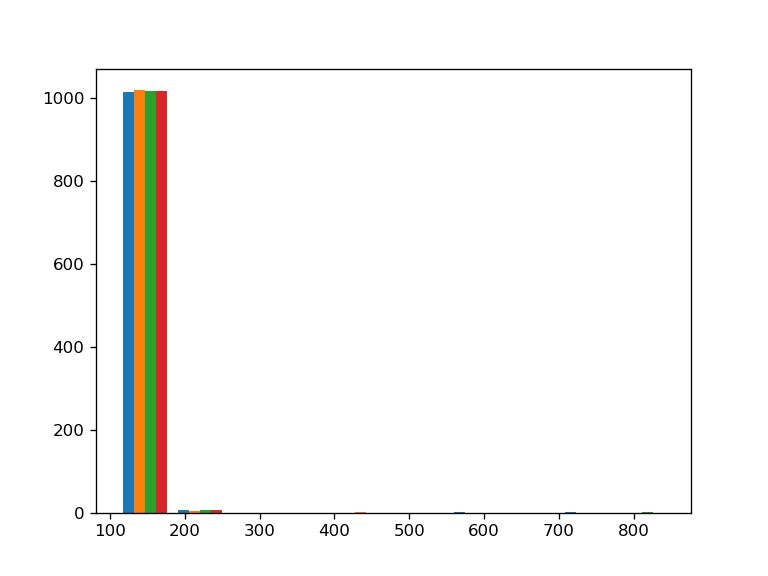

([array([1.015e+03, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00]),
  array([1.019e+03, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
  array([1.017e+03, 6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
  array([1018.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.])],
 array([110. , 183.8, 257.6, 331.4, 405.2, 479. , 552.8, 626.6, 700.4,
        774.2, 848. ]),
 <a list of 4 Lists of Patches objects>)

In [12]:
print(np.max(b[:,:,1]))
plt.hist(b[:,1:5,1])

In [11]:
a = np.load("E:\\TMT_SITE_RAID\\TMT_DATA_2\\T2-Armazones\\Test_Data\\o2006102201.npy")

In [6]:
print(a)

[[[50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  ...
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]]

 [[50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  ...
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]]

 [[50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  ...
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]]

 ...

 [[50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  ...
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]]

 [[50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  ...
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 50.]
  [50. 50. 50. ... 50. 50. 5

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


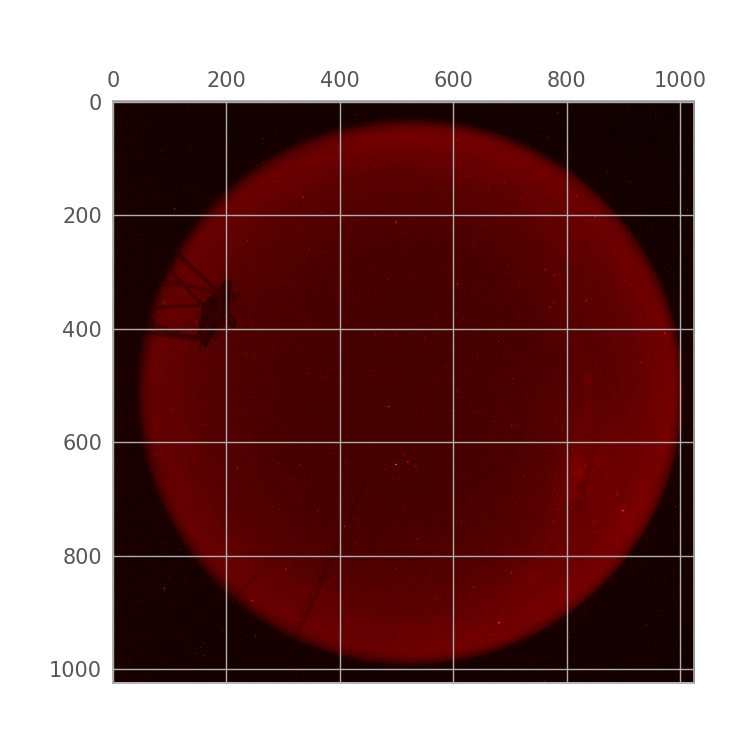

In [12]:
plt.matshow(np.log(a[:,:,16]))


<IPython.core.display.Javascript object>


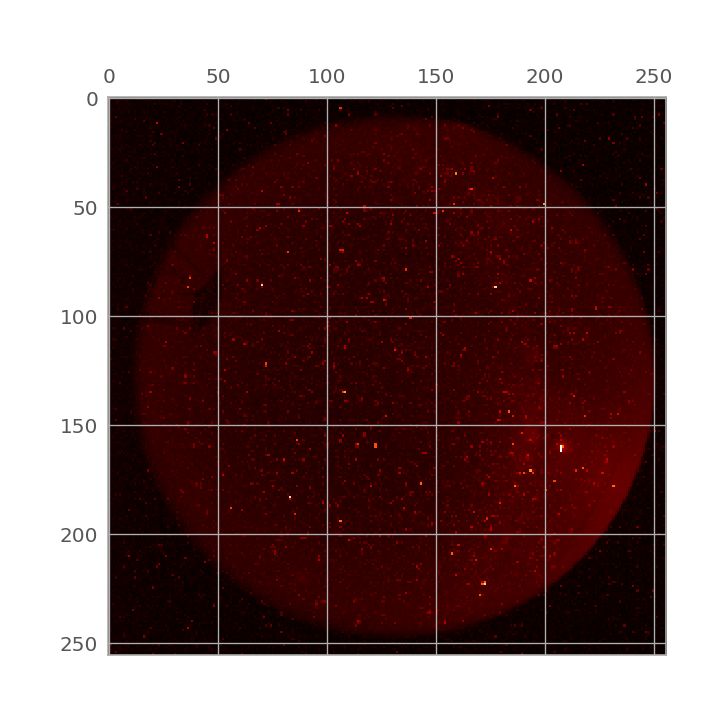

In [49]:
import numpy as np
import skimage.measure

c = skimage.measure.block_reduce(np.log(b), (4,4,1), np.max)


<IPython.core.display.Javascript object>


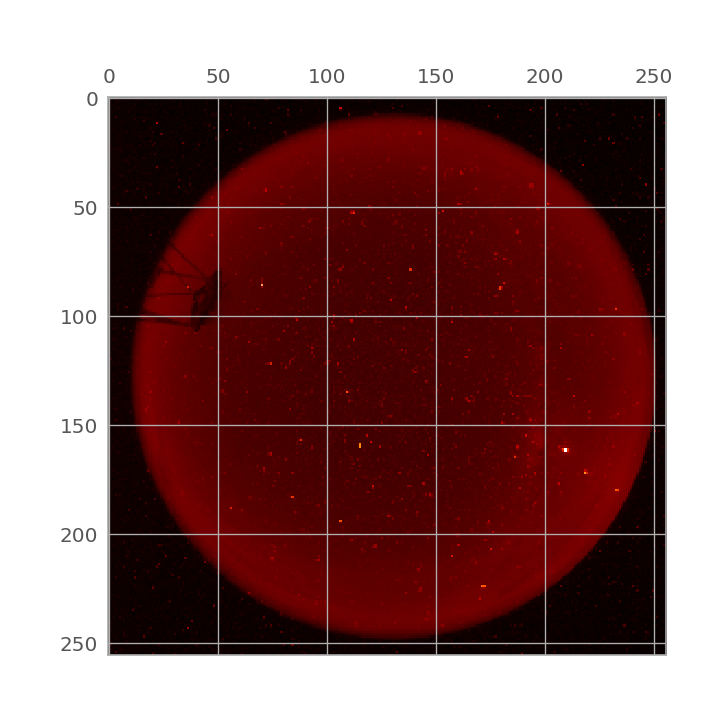

In [55]:
a= plt.matshow(c[:,:,18])